# Hola &#x1F600;,

Soy **Hesus Garcia** – , tu revisor de confianza, también conocido como **"El Hesus que lleva la H de 'héroe' del código" 🦸‍♂️**. Sí, soy el único Hesus con H que te ayudará a llevar tu trabajo al siguiente nivel. Estoy preparado con observaciones y sugerencias que harán que tu proyecto destaque y esté a la altura de las mejores prácticas en desarrollo. ¡Prepárate para mejorar y brillar en el mundo del código! 🚀

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

--- 

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


Omar Mancilla Martínez

# Proyecto Final: 

### Objetivos:

- pronosticar la tasa de cancelación de clientes
- generar un modelo que prediga que clientes planean abanoar el servicio
    - Determinar la curva AUC-ROC de dicho modelo
    - Determinar la exactitud del modelo

## Plan de Trabajo
Plan de trabajo para el proyecto final de Tripleten.

## EDA
Iniciamos con la un análisis exploratorio de los datos para entender la información que tenemos y determinar el plan a seguir.

Objetivos del EDA: 
- Entender las cuatro fuentes de datos que tenemos.
- Revisar la calidad de las fuentes de datos
- Generar un diccionario de datos
- Determinar que pre-procesamiento es necesario
- Encontrar tendencias generales en los datos
- Determinar el desbalance de clases


### Carga de datos:
Cargaremos las librerias pertinentes y los datos en archivos CSV.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # o el modelo que prefieras
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [2]:
df_personal = pd.read_csv("./datasets/personal.csv")
df_phone = pd.read_csv("./datasets/phone.csv ")
df_contract = pd.read_csv("./datasets/contract.csv")
df_internet = pd.read_csv("./datasets/internet.csv")

Ahora exploraremos los dataframes a traves de las siguientes funciones:

In [3]:
def explore(df):
    display(df.head())
    print(df.info())
    print("\n shape:", df.shape)
    display(df.describe())
    print("Cantidad de datos nulos:\n", df.isnull().sum(), "\n")

    print("Valores comunes:")
    for columna in df.columns:
        print(f"Valores más comunes en la columna '{columna}':")
        print(df[columna].value_counts())

In [4]:

def plot_raincloud(df):
    # Verify all columns are numeric
    if not all(pd.api.types.is_numeric_dtype(df[col]) for col in df.columns):
        raise ValueError(
            "All columns in the DataFrame must be numeric to create a raincloud plot.")

    fig, ax = plt.subplots(figsize=(8, 4))

    # Iterate over each column in the DataFrame and create a raincloud plot
    for idx, (column, data) in enumerate(df.items()):
        # Boxplot for each feature
        bp = ax.boxplot([data], patch_artist=True,
                        vert=False, positions=[idx + 1])
        bp['boxes'][0].set_facecolor(
            'yellowgreen' if idx % 2 == 0 else 'olivedrab')
        bp['boxes'][0].set_alpha(0.4)

        # Violin plot for each feature
        vp = ax.violinplot([data], points=500, showmeans=False, showextrema=False,
                           showmedians=False, vert=False, positions=[idx + 1])
        vp['bodies'][0].get_paths()[0].vertices[:, 1] = np.clip(
            vp['bodies'][0].get_paths()[0].vertices[:, 1], idx + 1, idx + 2)
        vp['bodies'][0].set_color('thistle' if idx % 2 == 0 else 'orchid')

        # Scatter plot for each feature with jitter
        y = np.full(len(data), idx + 1) + \
            np.random.uniform(low=-0.05, high=0.05, size=len(data))
        ax.scatter(data, y, s=0.3, c='tomato' if idx %
                   2 == 0 else 'darksalmon')

    ax.set_yticks(np.arange(1, len(df.columns) + 1))
    ax.set_yticklabels(df.columns)
    plt.xlabel('Values')
    plt.title("Raincloud plot")
    plt.show()

#### Personal:

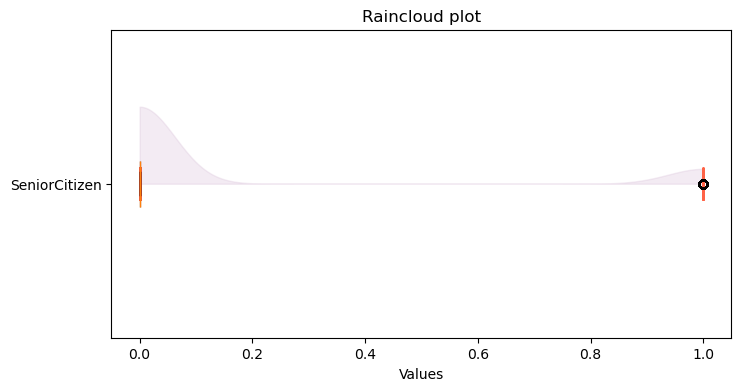

In [5]:
plot_raincloud(pd.DataFrame(df_personal["SeniorCitizen"]))

In [6]:
explore(df_personal)

##### Observaciones:
- Notamos que no tenemos valores nulos en el dataframe
- podemos codificar la mayoria de las columnas, pues son binarias. Como "gender", "partner", "seniorCitizen", 
- Solo el 16% son senior, segun SeniorCitizen

#### Contract:

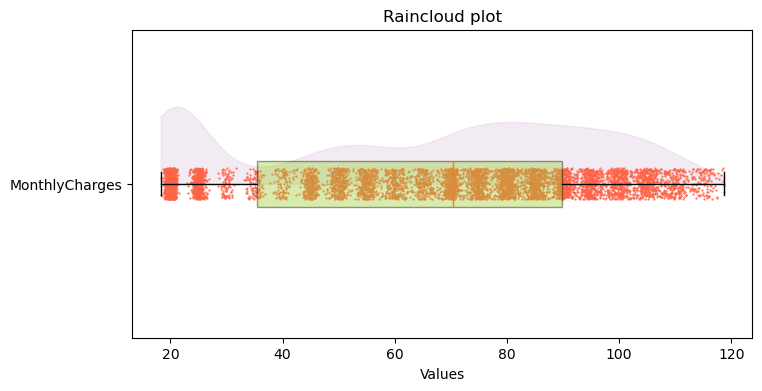

In [7]:
plot_raincloud(pd.DataFrame(df_contract["MonthlyCharges"]))

In [8]:
explore(df_contract)

##### Observaciones:
- Las columnas de fechas tienen un tipo incorrecto.
- ```TotalCharges``` tiene el tipo incorrecto y contiene valores invalidos ```" "```.
- ```Type,	PaperlessBilling,	PaymentMethod``` pueden ser codificados.
- ```MonthlyCharges``` parece estar distribuido de forma normal.
- ```EndDate``` usa "NO" para seleccionar clientes que no han terminado su contrato, evitando poder usar el formato correcto.

#### Internet:
No usaremos un raincloud plot, pues no hay columnas numericas.

In [9]:
explore(df_internet)

##### Observaciones:
- No tenemos datos nulos
- Todas las columnas excepto el id de cliente, pueden ser codificadas.

#### Phone:
No crearemos un raincloud plot, pues no hay columnas numericas.

In [10]:
explore(df_phone)

##### Observaciones:
- No tenemos datos nulos
- La unica columna puede ser codificada.

### Dicciónario de datos:
Con lo explroado podemos generar el siguiente diccionario de datos:

- Personal.csv
    - CustomerID: Identificador unico de cada cliente
    - gender: genero del cliente
    - SeniorCitizen: estado de señoria del cleinte
    - Partner: Estado civil del cliente, yes: casado
    - Dependents: ¿El cliente tiene familia que dependa de el?
- Contract.csv
    - customerID: Identificador unico de cada cliente
    - BeginDate: Fecha en la que se firmo el contrato
    - EndDate: Fecha en la que se abandono el servició, "No" en caso de que no se haya abandonado.
    - Type: tipo de facturación
    - PaperlessBilling: formato de las facturas
    - PaymentMethod: Metodo de pago
    - MonthlyCharges: Cargos mensuales
    - TotalCharges: Cargos totales
- Internet.csv
    - CustomerID: Identificador unico de cada cliente
    - InternetService
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
- Phone.cvs
    - CustomerID: Identificador unico de cada cliente
    - MultipleLines: ¿El cliente tiene mas de una linea telefonica?

### Pre-procesamiento:
Aplicamos las observaciones a los respectivos datasets:

#### contract:  
Cambiaremos el formato de las fechas, igualmente cambiaremos "No" para los contratos no terminados, por una fecha futura.

In [ ]:
df_contract["BeginDate"] = df_contract["BeginDate"].astype("datetime64[ms]")
df_contract["EndDate"] = (df_contract["EndDate"].replace(
    "No", "2025-01-01")).astype("datetime64[ms]")

Eliminamos los valores invalidos de "TotalCharges", debido a que solo tenemos 11 entradas y cambiamos el tipo de dato:

In [ ]:

df_contract[df_contract["TotalCharges"] == " "].info()
df_contract = df_contract[df_contract["TotalCharges"].replace(
    " ", np.nan).notna()]

In [ ]:
df_contract["TotalCharges"] = df_contract["TotalCharges"].astype("float64")
df_contract[df_contract["TotalCharges"] == " "]

Con esto corroboramos que los datos son correctos:



In [14]:
df_contract.info()
df_contract

### Enriquecimiento de datos:
Crearemos la columna churn en "df_contract", esta columna sera nuestro objetivo en los modelos.


In [ ]:
df_contract["churn"] = df_contract["EndDate"].apply(
    lambda x: 1 if x < pd.to_datetime("2025-01-01")
    else 0)

### Dataframe maestro:

Crearemos un dataframe maestro con la intención de juntar la información a trabajar, esto a través de inner joins con el proposito de tener unicamente registros completos.


In [ ]:
df_master = df_contract.merge(df_personal, how="inner", on="customerID")
df_master = df_master.merge(df_internet, how="inner", on="customerID")
df_master = df_master.merge(df_phone, how="inner", on="customerID")

df_master

In [17]:
df_master.info()

## Procesamiento para los modelos:

Realizaremos la separación entre caracteristicas y objetivo del dataframe maestro.

### Separación de caracteristicas:
Retiraremos "CustomerID" pues sabemos no es necesario, se filtraran mas caractisticas mas adelante.



In [ ]:
features = df_master.drop(["customerID", "churn", "EndDate"], axis=1)
target = df_master["churn"]

### Codificación de caracteristicas:


In [ ]:
features_ohe = pd.get_dummies(features, drop_first=True)
features_ohe

In [20]:
features_ohe.info()

### Balanceo de clases:

In [ ]:
target.value_counts()

Podemos ver que hay un desbalance de clases de alrededor de 65-35.

Balancearemos la cantidad de clases usando SMOTE

In [ ]:

# Selecciona la columna objetivo (la que tiene la clase desbalanceada)
y = target

# Selecciona las columnas de características
features_ohe_num = features_ohe
features_ohe_num['BeginDate'] = pd.to_numeric(features_ohe['BeginDate'])
X = features_ohe

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados (opcional)
features_ohe_resampled = pd.DataFrame(X_resampled, columns=X.columns)
features_ohe_resampled["BeginDate"] = features_ohe_resampled["BeginDate"].astype(
    "datetime64[ms]")
target_resampled = y_resampled

# Revisar la distribución de las clases después de aplicar SMOTE
print("Distribución de clases después de SMOTE:")
print(target_resampled.value_counts())

In [27]:
features_ohe_resampled.info()

### División del dataset:
Dividiremos el dataset en dos partes:
- Train & validtion 90%
- Test 10%

Esto debido a que usaremos cross validation en los modelos para evaluar de forma robusta.


In [ ]:
TV_features, test_features, TV_target, test_target = train_test_split(
    features_ohe, target, test_size=0.1, random_state=42
)

### Escalado de caracteristicas
Debido a que evaluaremos con cross validation, el escalado se hara dentro de cada "pliegue" del dataset TV a través de pipelines, esto para evitar data leakage.

In [ ]:
def pipeline(Model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Escala las características
        ('model', Model())  # Elige el modelo que deseas
    ])

### Selección de caracteristicas:
Usaremos boruta junto con un bosque aleatorio para seleccionar las caracteristicas relevantes para los modelos, esto con el fin de disminuir la carga computacional y reducir el tiempo de ejecución:

In [ ]:
X = (TV_features.drop(["BeginDate"], axis=1)).values
y = TV_target.values
y = y.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
features_selected = feat_selector.transform(X)

In [28]:
features_selected.shape

Boruta ha seleccionado diez caracteristicas para el modelo.

Procederemos a graficar la importancia de las caracteristicas en un bosque de decición:

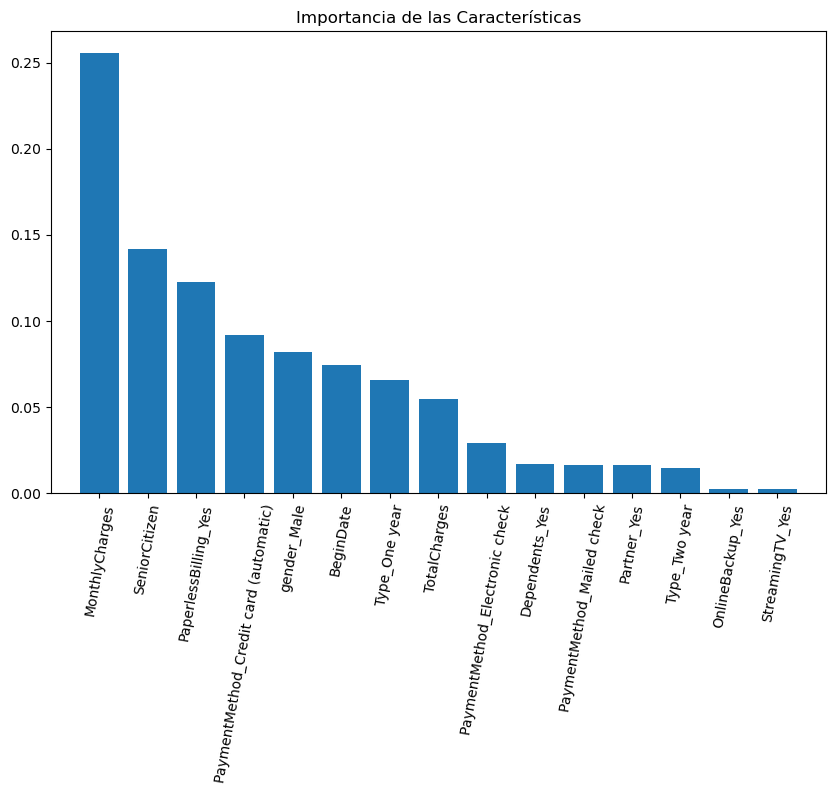

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = TV_features.columns

n = 15
plt.figure(figsize=(10, 6))

plt.title("Importancia de las Características")


plt.bar(range(n), importances[indices[:n]])
plt.xticks(range(n), feature_names[indices[:n]], rotation=80)
plt.xlim([-1, n])
plt.show()

Observacuiones:
- Boruta selecciono diez caracteristicas.
- La importancia de las caracteristicas disminuye a la mitad a partir de la cuarta caracteristica, asi que consideramos la decisión de boruta apropiada.

## Analisís de los datos:

A partir de ahora desarrollaremos los modelos de ML con las caracteristicas trabajadas hasta ahora.
Aqui comienza la solución de la asignación principal:


### Generar modelos de Machine Learning:


#### Modelo Dummy:

#### Arbol de decisiones:


#### Random Forest:


#### Regresión Logística

#### Decenso de gradiente

### Evaluación de los modelos:


#### Curva ROC

#### Valor PR

#### Exploración de resultados:

### Exploración del mejor modelo:

#### Puntuajes

#### Curva ROC

#### Curva PR

## Observaciones y Conclusiones

# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

¡Omar, tu proyecto ya es muy sólido y tiene una estructura excelente para el análisis y modelado de datos! 🚀 Honestamente, podríamos aprobarlo en este punto, ya que cumple con los requisitos esenciales. Sin embargo, creo que podrías beneficiarte de obtener un poco de feedback adicional para perfeccionar algunos detalles antes de avanzar.

### Lo que se Está Haciendo Bien:
1. **Análisis Exploratorio de Datos (EDA) Completo**: Has realizado un EDA exhaustivo que aborda la calidad de los datos y te da un buen punto de partida. ¡Excelente trabajo en identificar variables importantes y planificar el preprocesamiento!
2. **Pre-procesamiento de Datos**: Me gusta cómo has abordado problemas específicos, como la codificación y los tipos de datos incorrectos. Este nivel de detalle asegura que tu dataset esté en óptimas condiciones para el modelado.
3. **Planificación de Modelos**: Considerar múltiples enfoques, desde modelos básicos hasta algoritmos más avanzados, muestra una estrategia robusta. ¡Gran elección al evaluar diferentes métodos!
4. **Evaluación Completa**: Incluir métricas como la curva ROC y el valor PR te permitirá evaluar a fondo el rendimiento de los modelos, y me alegra ver que estás considerando estas medidas.

### Áreas de Mejora y Consideraciones Adicionales:
1. **Selección de Características**: Aunque tu análisis es muy bueno, podrías explorar técnicas avanzadas para afinar la selección de variables. Podrías investigar métodos como **embedding, wrapping y filtering**:
   - **Filtering**: Basado en criterios estadísticos independientes del modelo.
   - **Wrapping**: Utiliza el rendimiento del modelo para seleccionar características.
   - **Embedding**: Se realiza dentro del propio proceso de entrenamiento del modelo.
   - Herramientas como **SHAP** o **Boruta** podrían ofrecerte insights valiosos. Esto dependerá del tiempo que tengas para implementar estas ideas.
2. **Evaluación de Tiempo**: Utilizar `timeit` para medir el tiempo de ejecución de tus procesos podría ser muy útil, especialmente si trabajas con datasets extensos. Esto no es obligatorio, pero es una práctica recomendada para proyectos de gran envergadura.
3. **Balance de Clases**: Te sugiero detallar más tu enfoque para balancear las clases, explicando las técnicas que planeas usar, como **SMOTE** o **undersampling**, y por qué las seleccionaste. Esto aportará más claridad a tu metodología.

### Reflexión Final:
Tu proyecto es impresionante y está listo para destacarse. Estas sugerencias son opcionales y dependen de tu disponibilidad de tiempo para integrarlas. Si decides implementarlas, podrían enriquecer aún más tu análisis y hacer tu proyecto más robusto.

**Si no decides agregar estas mejoras, puedes simplemente regresar el proyecto tal y como está, y lo aprobaré inmediatamente.** De cualquier forma, ¡has hecho un gran trabajo hasta ahora!

¡Sigue con ese entusiasmo y pasión por aprender! Este proyecto te está preparando muy bien para una carrera exitosa en ciencia de datos, y estoy seguro de que te abrirá muchas oportunidades. 🌟😊 ¡Mucho éxito y sigue adelante con confianza!
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hesus, te agradezco las observaciones y recomendaciones, puse en practica varias y deje afuera otras, sin embargo espero seguir itereando el proyecto en las siguientes etapas.


    
</div>

# Comentario de Segunda Iteración

<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho!  &#128077;  Podemos aprobar el proyecto. <br>
Has demostrado un excelente conocimiento en la construcción de modelos, al eliminar variables innecesaria <br>
<br>Quiero felicitarte por un trabajo excepcional y por la calidad de tu análisis. Te animo a que sigas aprendiendo y desafiando tu potencial en los próximos sprints. Estoy seguro de que tus habilidades y conocimientos serán valiosos en el futuro y te permitirán abordar problemas cada vez más complejos con éxito.
</div>